# Assignment 2
**COMP 4107 Fall 2017**

**Basim Ramadhan & Christian Abbott**

***

### You must show that you have: Performed K-fold cross correlation.

### Using Weight Decay for Regularization.

## Investigating Performance for Different Numbers of Hidden Layers.

For each of the following experiements, we used:
* Learning Rate: 0.005
* Weight Decay: 0.2
* Number of folds: 100
* Samples per fold: 600

#### Zero Hidden Layers

image

Architecture:
* Input layer: 784
* Output Layer: 10

100-fold cross validation error: 14.62%

TODO-insert-explaination-here

#### One Hidden Layer

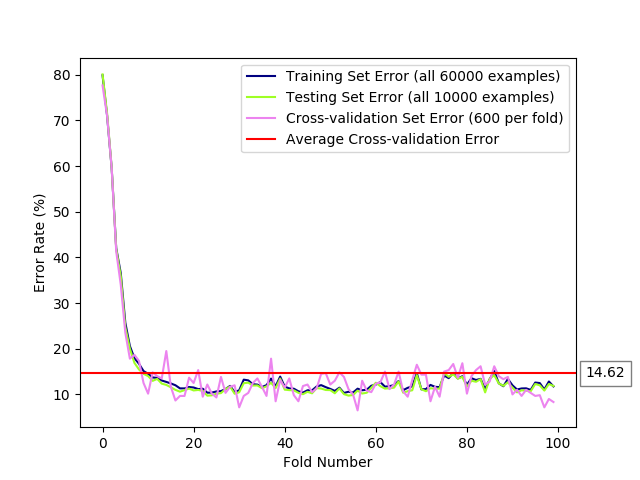

Architecture:
* Input layer: 784
* Hidden Layer: 60
* Output Layer: 10

100-fold cross validation error: 14.62%

TODO-insert-explaination-here

#### Two Hidden Layers

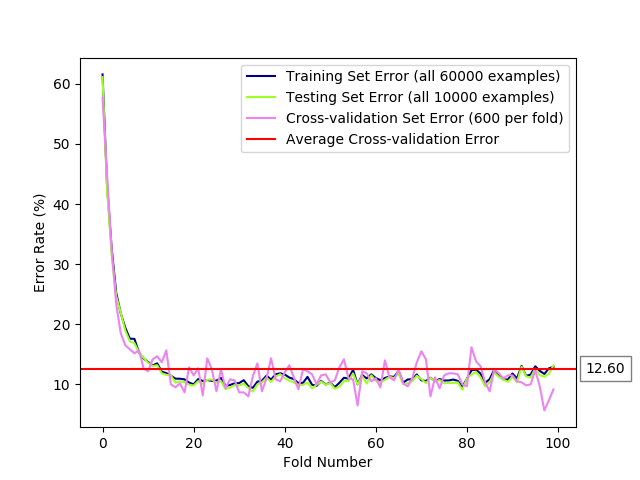

Architecture:
* Input layer: 784
* Hidden Layer 1: 60
* Hidden Layer 2: 30
* Output Layer: 10

100-fold cross validation error: 12.60%

TODO-insert-explaination-here

#### Three Hidden Layers

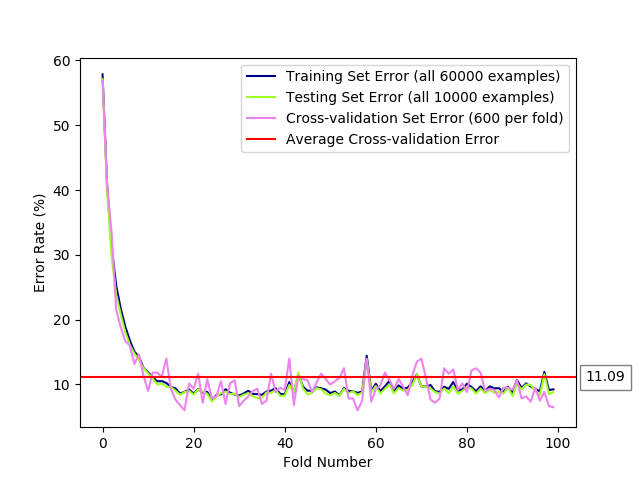

Architecture:
* Input layer: 784
* Hidden Layer 1: 120
* Hidden Layer 2: 60
* Hidden Layer 3: 30
* Output Layer: 10

100-fold cross validation error: 11.09%

TODO-insert-explaination-here

#### Four Hidden Layers

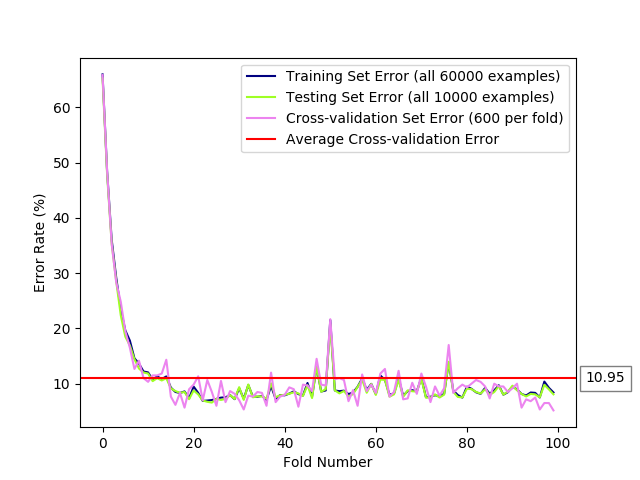

Architecture:
* Input layer: 784
* Hidden Layer 1: 240
* Hidden Layer 2: 120
* Hidden Layer 3: 60
* Hidden Layer 4: 30
* Output Layer: 10

100-fold cross validation error: 10.95%

TODO-insert-explaination-here


#### Conclusions

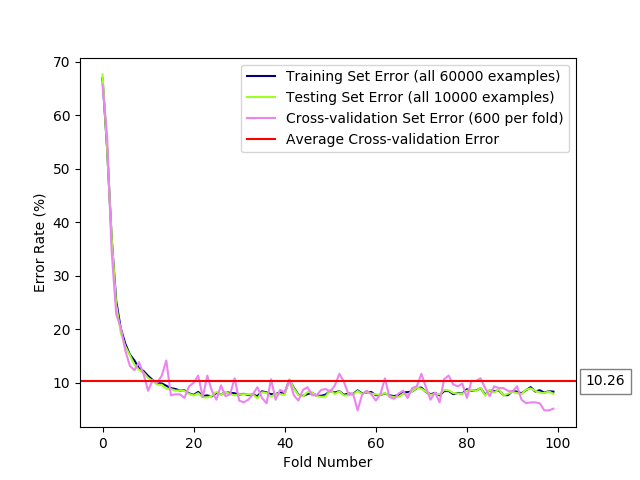

Architecture:
* Input layer: 784
* Hidden Layer 1: 160
* Hidden Layer 2: 60
* Output Layer: 10

100-fold cross validation error: 10.26%

After some experimentation, we settled on two hidden layers. It provided a good balance between accuracy and training speed. Now we'll try experimenting with the sizes of those two hidden layers.

## Investigating Performance for Different Sizes of Hidden Layers.

### Small Layers

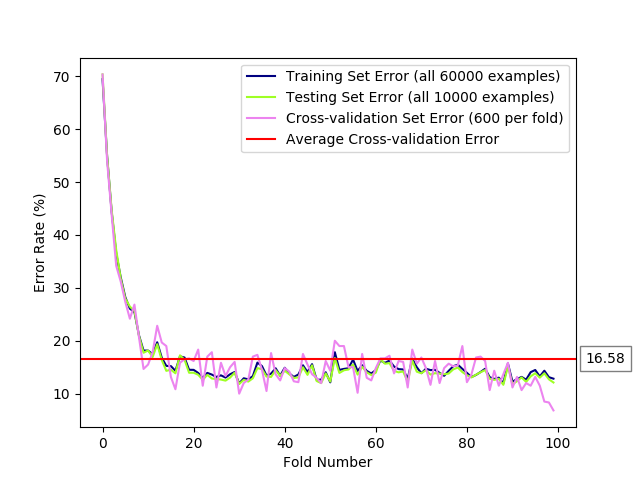

Architecture:
* Input layer: 784
* Hidden Layer 1: 30
* Hidden Layer 2: 15
* Output Layer: 10

100-fold cross validation error: 16.58%

TODO-insert-explaination-here

### Medium Layers

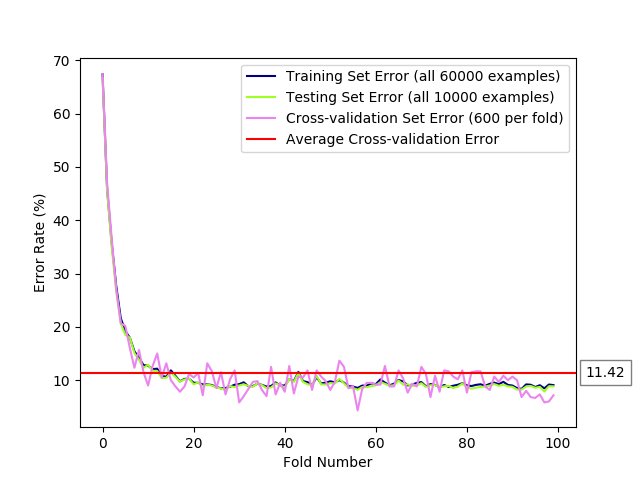

Architecture:
* Input layer: 784
* Hidden Layer 1: 100
* Hidden Layer 2: 50
* Output Layer: 10

100-fold cross validation error: 11.42%

TODO-insert-explaination-here

### Large Layers

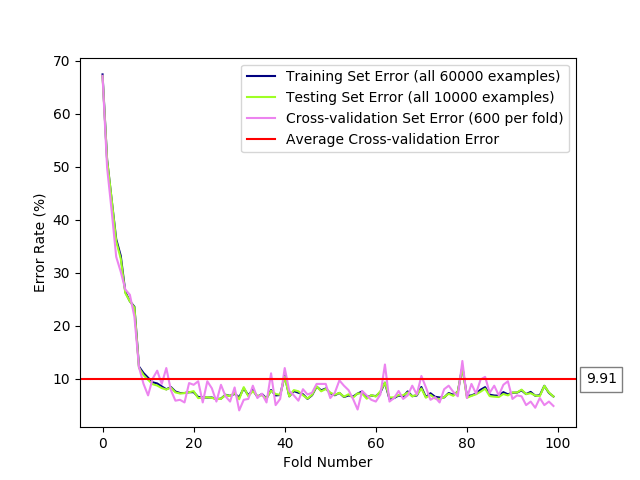

Architecture:
* Input layer: 784
* Hidden Layer 1: 300
* Hidden Layer 2: 100
* Output Layer: 10

100-fold cross validation error: **9.91%**

TODO-insert-explaination-here

### Very Large Layers

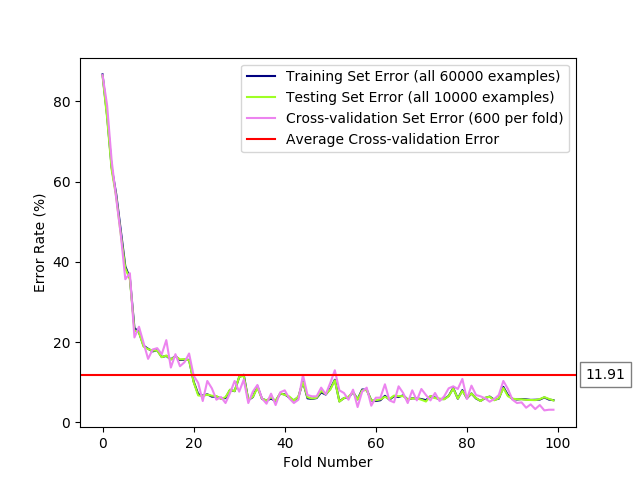

Architecture:
* Input layer: 784
* Hidden Layer 1: 500
* Hidden Layer 2: 200
* Output Layer: 10

100-fold cross validation error: 11.91%

TODO-insert-explaination-here

### Same Size Layers

image

Architecture:
* Input layer: 784
* Hidden Layer 1: ???
* Hidden Layer 2: ???
* Output Layer: 10

100-fold cross validation error: 

TODO-insert-explaination-here

### Layers With Wide Size Difference

image

Architecture:
* Input layer: 784
* Hidden Layer 1: ???
* Hidden Layer 2: ???
* Output Layer: 10

100-fold cross validation error: 

TODO-insert-explaination-here